In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures


In [1]:
pip install ucimlrepo

In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)


In [18]:

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# metadata
print(magic_gamma_telescope.metadata)

# variable information
print(magic_gamma_telescope.variables)


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [19]:
X

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [20]:
y

,class
0,g
1,g
2,g
3,g
4,g
...,...
19015,h
19016,h
19017,h
19018,h


Mapping g and h

In [21]:
mapping={
    'g':0,
    'h':1
}
y.loc[:, 'class'] = y['class'].map(mapping)

In [22]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
19015,1
19016,1
19017,1
19018,1


In [23]:
y=y['class'].to_numpy()
y.astype(int)
y=pd.Series(y)

<Axes: title={'center': "Class Distribution After Sampling| 0:Gamma | 1 : Hadron'"}>

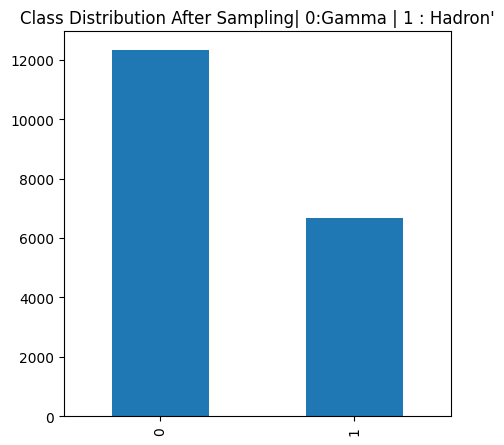

In [24]:
plt.figure(figsize=(5,5))

y.value_counts().plot(kind = "bar", title = "Class Distribution After Sampling| 0:Gamma | 1 : Hadron'")

In [25]:
y=y.astype(int)

Appling SMOTE to balance the data

In [26]:
# Create balance in the data
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: title={'center': "Class Distribution After Sampling| 0:Gamma | 1: Hadron'"}>

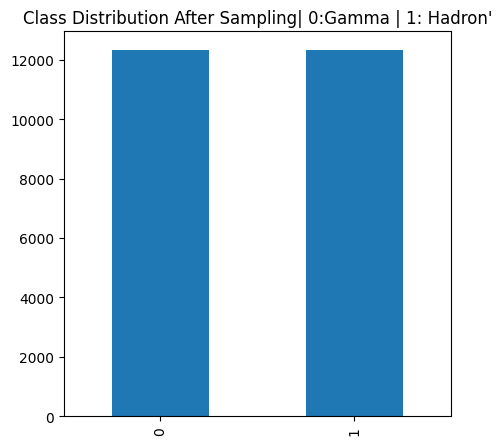

In [27]:
plt.figure(figsize=(5,5))

y_resampled.value_counts().plot(kind = "bar", title = "Class Distribution After Sampling| 0:Gamma | 1: Hadron'")

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

Creating new features using feature engineering

In [123]:
# Polynomial feature generation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Original Features:\n", X)
print("Polynomial Features:\n", X_train_poly)



Original Features:
         fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205

In [124]:
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test.index)


In [125]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_poly_df)
X_test_sc = scaler.transform(X_test_poly_df)

In [126]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_poly_df.columns, index=X_train_poly_df.index)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_poly_df.columns, index=X_test_poly_df.index)

MODEL TRAINING

Logistic Regression

In [127]:
accuracy_list=[]

In [128]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_sc,y_train)

y_pred=model.predict(X_test_sc)


In [129]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8467464017839044
[[2185  313]
 [ 443 1992]]


Random Forest Classifier

In [130]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_sc,y_train)
y_pred=rf.predict(X_test_sc)

In [131]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.894587472126495
[[2271  227]
 [ 293 2142]]


Decision Trees

In [132]:
dc = DecisionTreeClassifier(random_state = 0)
dc.fit(X_train_sc,y_train)
y_pred = dc.predict(X_test_sc)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)
accuracy_list.append(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8285019258057977
[[2049  449]
 [ 397 2038]]


XG Boost

In [133]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_classifier.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
y_pred = xgb_classifier.predict(X_test_sc)

accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8637745793634705
[[2256  242]
 [ 430 2005]]


Naive Bayes

In [135]:
nb=GaussianNB()
nb.fit(X_train_sc,y_train)

GaussianNB()

In [136]:
y_pred = nb.predict(X_test_sc)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
accuracy_list.append(accuracy)

cm=confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.6663288060004054
[[2356  142]
 [1504  931]]


KNN

In [137]:
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_sc,y_train)
y_pred=knn.predict(X_test_sc)

In [138]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8542469085749037
[[2185  313]
 [ 406 2029]]


SVM

In [145]:
svm=SVC()
svm.fit(X_train_sc,y_train)
y_pred=svm.predict(X_test_sc)


In [146]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_list.append(accuracy)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.859517534968579
[[2271  227]
 [ 466 1969]]


Neural Network

In [139]:
X_train_nn,X_val,y_train_nn,y_val=train_test_split(X_train_sc,y_train,test_size=0.2,random_state=42)

In [140]:
model=Sequential(
    [
        Dense(128,activation='relu',input_shape=(X_train_nn.shape[1],)),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [141]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_nn,y_train_nn,epochs=10,batch_size=32,validation_data=(X_val,y_val))

y_pred = (model.predict(X_test_sc) > 0.8).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
accuracy_list.append(accuracy)

print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test,y_pred))

Epoch 1/10
494/494 [==============================] - 4s 4ms/step - loss: 0.3915 - accuracy: 0.8224 - val_loss: 0.3599 - val_accuracy: 0.8399
Epoch 2/10
494/494 [==============================] - 2s 3ms/step - loss: 0.3382 - accuracy: 0.8486 - val_loss: 0.3531 - val_accuracy: 0.8434
Epoch 3/10
494/494 [==============================] - 2s 4ms/step - loss: 0.3291 - accuracy: 0.8545 - val_loss: 0.3431 - val_accuracy: 0.8472
Epoch 4/10
494/494 [==============================] - 6s 13ms/step - loss: 0.3188 - accuracy: 0.8581 - val_loss: 0.3480 - val_accuracy: 0.8449
Epoch 5/10
494/494 [==============================] - 3s 5ms/step - loss: 0.3142 - accuracy: 0.8595 - val_loss: 0.3347 - val_accuracy: 0.8482
Epoch 6/10
494/494 [==============================] - 2s 3ms/step - loss: 0.3091 - accuracy: 0.8624 - val_loss: 0.3386 - val_accuracy: 0.8533
Epoch 7/10
494/494 [==============================] - 2s 3ms/step - loss: 0.3045 - accuracy: 0.8652 - val_loss: 0.3421 - val_accuracy: 0.8513
Epoch

In [147]:
models=['Logistic Regression',
        'Random Forest Classifier',
        'Decision Trees',
        'XG Boost',
        'Naive Bayes',
        'KNN',
        'Neural Network',
        'SVM'
        ]

In [148]:
results=pd.DataFrame({'Model':models,'Accuracy':accuracy_list})

In [149]:
results

,Model,Accuracy
0,Logistic Regression,0.846746
1,Random Forest Classifier,0.894587
2,Decision Trees,0.828502
3,XG Boost,0.863775
4,Naive Bayes,0.666329
5,KNN,0.854247
6,Neural Network,0.843503
7,SVM,0.859518
